## Insurance Claim: Data Cleaning, imputation and preparation
***
In this notebook (first of two parts) we work with an isurance claim dataset--which is not publicly available. This dataset is not clean, has numerous missing entries and outliers in most of the columns.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from fancyimpute import KNN
from sklearn.neighbors import NearestNeighbors

%matplotlib inline

### Loading the data and basic visual inspection
***
**Observations**
- From the info() function, we see that there are several columns with missing entries.
- From the describe() function we get an idea that several out the column could have outliers.

In [83]:
## Load the train data
df_train_raw = pd.read_csv("./datasets/exercise_02_train.csv")

## Load the test data
df_test_raw = pd.read_csv("./datasets/exercise_02_test.csv")

In [84]:
print ("Train data shape: ", df_train_raw.shape)
print ("Test data shape: ", df_test_raw.shape)

('Train data shape: ', (40000, 101))
('Test data shape: ', (10000, 100))


In [85]:
# INSPECT the train data: NOTED that there are six objects columns
print df_train_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Columns: 101 entries, x0 to y
dtypes: float64(94), int64(1), object(6)
memory usage: 30.8+ MB
None


In [86]:
df_test_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 100 columns):
x0     9997 non-null float64
x1     9998 non-null float64
x2     9999 non-null float64
x3     9996 non-null float64
x4     10000 non-null float64
x5     9995 non-null float64
x6     9999 non-null float64
x7     9996 non-null float64
x8     9999 non-null float64
x9     9998 non-null float64
x10    9998 non-null float64
x11    9998 non-null float64
x12    9999 non-null float64
x13    9997 non-null float64
x14    9998 non-null float64
x15    9995 non-null float64
x16    9998 non-null float64
x17    9999 non-null float64
x18    9999 non-null float64
x19    9999 non-null float64
x20    9998 non-null float64
x21    9998 non-null float64
x22    9999 non-null float64
x23    9999 non-null float64
x24    9998 non-null float64
x25    10000 non-null float64
x26    9998 non-null float64
x27    9999 non-null float64
x28    9999 non-null float64
x29    9999 non-null float64
x30    9999 non-nul

In [87]:
df_train_raw.describe()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x90,x91,x92,x94,x95,x96,x97,x98,x99,y
count,39989.000000,39990.000000,39992.000000,39991.000000,39992.000000,39994.000000,39990.000000,39991.000000,39994.000000,39993.000000,...,39993.000000,39996.000000,39993.000000,39992.000000,39992.000000,39985.000000,39987.000000,39994.000000,39987.000000,40000.00000
mean,3.446069,-7.788884,1.706058,-0.072972,0.123077,-0.608624,0.035576,-0.052651,-2.909764,-0.024265,...,-9.002636,-0.001751,-0.005731,-0.014064,-0.095040,-0.807556,-2.514305,0.038370,0.043218,0.20360
std,16.247547,37.014862,38.385085,1.503243,16.289994,15.585122,9.041371,6.953403,13.149006,2.939895,...,96.666843,2.626840,4.605320,2.166326,27.516763,23.836194,18.554646,8.450995,1.114444,0.40268
min,-60.113902,-157.341119,-163.339956,-6.276969,-61.632319,-62.808995,-35.060656,-26.736717,-53.735586,-11.497395,...,-422.711982,-10.179216,-20.044113,-9.396153,-125.064735,-108.474714,-73.908741,-35.416133,-4.376614,0.00000
25%,-7.602474,-32.740989,-24.141605,-1.088182,-10.896241,-11.183089,-6.090255,-4.747798,-11.722776,-2.004215,...,-73.209185,-1.777981,-3.113418,-1.491537,-18.465082,-16.826144,-15.026614,-5.645656,-0.710712,0.00000
50%,3.448865,-8.019993,1.963977,-0.062389,0.104277,-0.574567,0.046812,-0.037727,-2.941234,-0.054526,...,-6.884549,-0.019422,-0.007618,-0.012195,0.099472,-0.651197,-2.509525,0.023663,0.042663,0.00000
75%,14.266716,16.853383,27.516500,0.940612,11.078565,9.955357,6.100903,4.637982,5.865014,1.955100,...,56.676810,1.761629,3.100729,1.450074,18.514579,15.275896,9.889591,5.728781,0.797856,0.00000
max,75.311659,153.469221,154.051060,5.837559,65.949709,63.424046,45.053946,34.267792,66.936936,11.271939,...,378.752405,11.295740,19.414284,9.136848,112.390710,92.926545,76.120119,34.170189,4.490209,1.00000


In [88]:
df_train_raw.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x91,x92,x93,x94,x95,x96,x97,x98,x99,y
0,0.198560,74.425320,67.627745,-3.095111,-6.822327,19.048071,-0.362378,-10.699174,-22.699791,-1.561262,...,0.800948,1.553846,asia,-1.093926,16.202557,26.238591,-2.125570,9.644466,1.237667,0
1,-29.662621,24.320711,-48.205182,1.430339,-6.552206,4.263074,6.551412,4.265483,1.245095,2.246814,...,2.031707,7.544422,asia,-3.659541,29.674259,-15.141647,-36.030599,5.820376,1.952183,1
2,15.493759,-66.160459,50.512903,-2.265792,14.428578,2.509323,-6.707536,3.820842,-11.100833,-1.459825,...,-0.992474,1.385799,america,1.299144,33.018090,-19.914894,26.212736,2.372690,0.558988,1
3,-19.837651,33.210943,53.405563,1.079462,11.364251,-1.064581,9.308857,9.266076,14.552959,-2.012755,...,-1.157845,6.036804,asia,0.521396,9.664095,-27.197636,19.221130,13.382712,0.214462,0
4,11.896655,-26.717872,-17.758176,1.692017,21.553537,-5.852097,-0.857435,-2.186940,18.075272,-1.404618,...,-3.045511,-1.719337,asia,1.526071,-25.608326,33.383803,-5.703269,-11.023730,-1.191319,0


In [222]:
df_test_raw.head() # OBSERVED that labels column 'y' is not there in test data

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x90,x91,x92,x93,x94,x95,x96,x97,x98,x99
0,6.625366,54.479467,15.285444,-0.794648,22.498346,-29.212209,1.435134,-4.551934,5.930404,-3.319388,...,-18.919238,1.774657,2.216406,america,0.987554,34.396477,-55.883515,13.739194,2.824056,1.141799
1,3.796927,-20.244923,-18.084196,-1.113454,-3.551728,-4.025589,1.971885,-1.965186,13.210722,-4.262240,...,33.878264,-1.027421,7.924785,asia,2.615088,15.038461,-13.110477,-13.018951,-5.069025,0.568757
2,31.875080,-61.467354,14.943580,0.979055,6.796937,-29.708041,4.778812,-2.682217,-17.122526,0.903299,...,-28.553940,1.755786,-0.325669,asia,-0.986222,-1.769850,-7.140415,0.791425,-3.224037,-0.816682
3,15.266588,-18.454831,1.105534,-2.718771,-5.511702,2.252314,-8.017649,3.635776,-13.024884,-1.751722,...,14.380384,-0.756253,5.930171,asia,-2.199690,-16.389740,-2.564346,-16.716012,5.559949,0.603007
4,-17.616761,15.810515,-17.972025,-1.995724,-23.112552,-15.899861,-17.054154,4.097427,-7.755402,-2.553410,...,-22.999896,-1.364063,1.207973,asia,1.694508,-4.086831,-28.709156,23.003355,-4.358594,1.929231


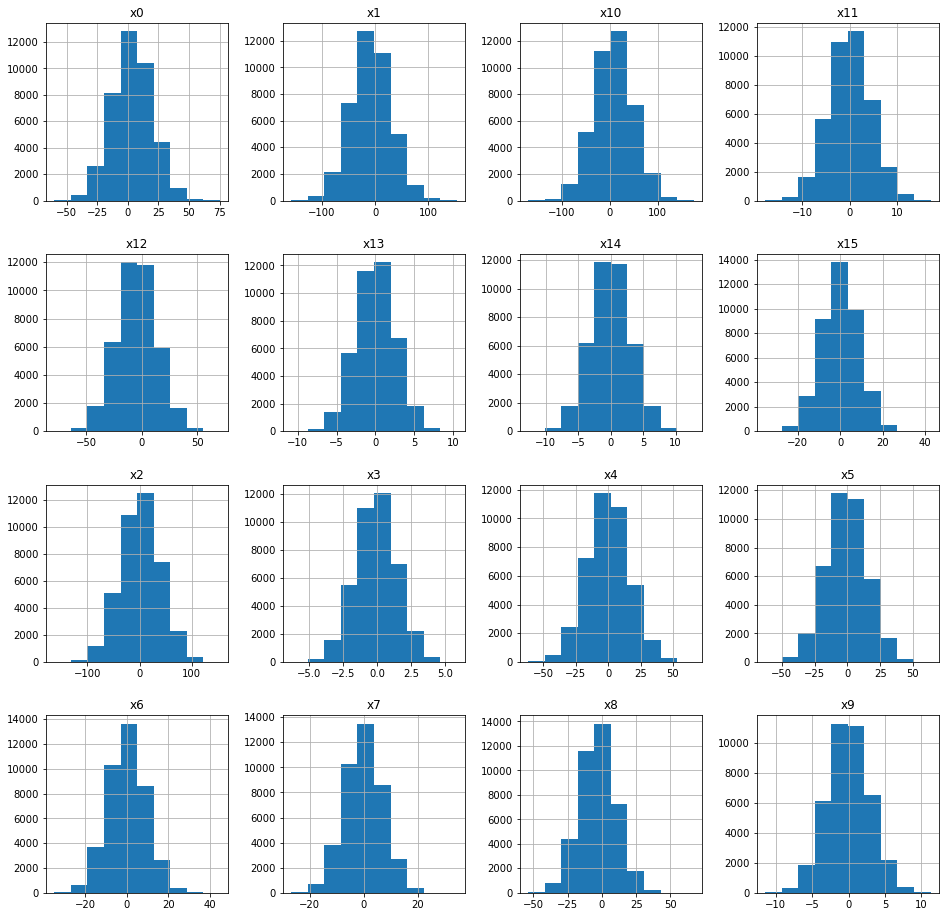

In [89]:
axes = df_train_raw.iloc[:,0:16].hist(figsize=(16,16))

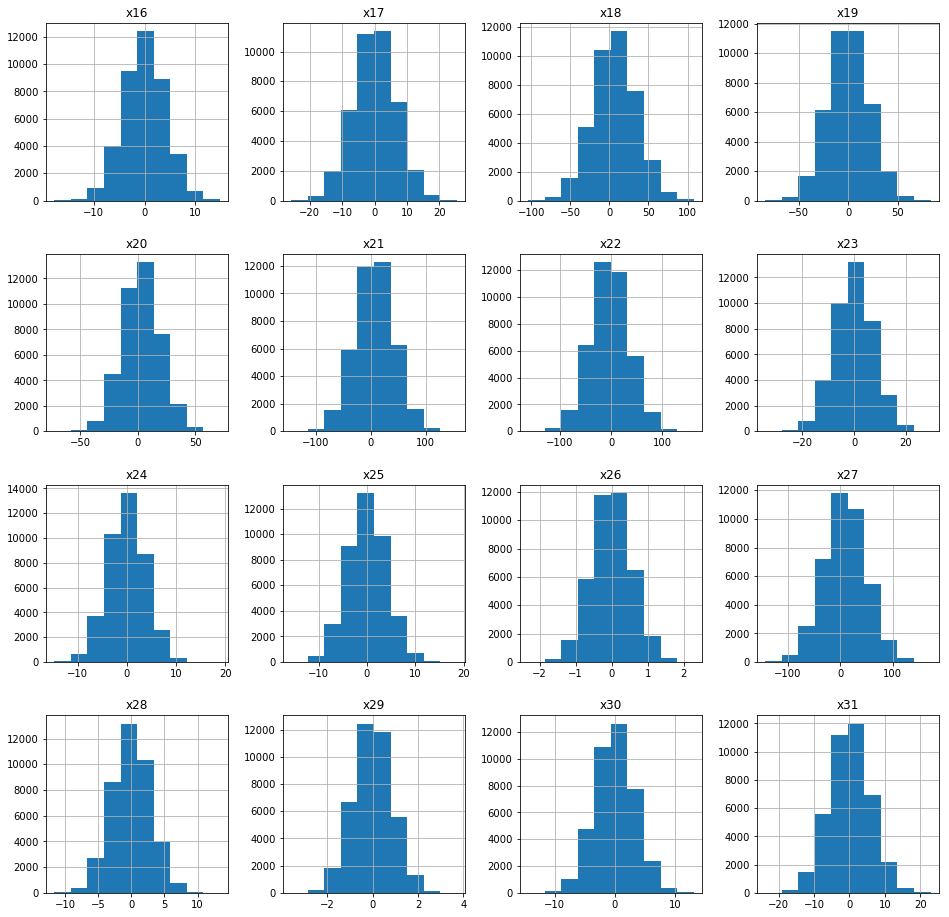

In [10]:
axes2 = df_train_raw.iloc[:,16:32].hist(figsize=(16,16))

# Study the categorical features
<hr>
<li> Notice that some entries are missing in evey categorical feature in both train and test data</li>

In [223]:
# Find Categorical Features
df_train_cat = df_train_raw.loc[:, df_train.dtypes == object]
df_test_cat = df_test_raw.loc[:, df_train.dtypes == object]

In [224]:
df_train_cat.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 6 columns):
x34    39993 non-null object
x35    39987 non-null object
x41    39996 non-null object
x45    39995 non-null object
x68    39992 non-null object
x93    39993 non-null object
dtypes: object(6)
memory usage: 1.8+ MB


In [225]:
df_test_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
x34    9998 non-null object
x35    10000 non-null object
x41    9998 non-null object
x45    9998 non-null object
x68    9997 non-null object
x93    9999 non-null object
dtypes: object(6)
memory usage: 468.8+ KB


In [226]:
#Observe Categorical Variables
df_test_cat.head()

,x34,x35,x41,x45,x68,x93
0,volkswagon,wed,$2475.46,-0.01%,Aug,america
1,bmw,thurday,$-1109.1,0.0%,Jun,asia
2,volkswagon,thurday,$-187.7,-0.0%,sept.,asia
3,Toyota,wednesday,$525.65,0.01%,July,asia
4,Toyota,thurday,$-1113.53,0.0%,Apr,asia


In [227]:
df_train_cat.head()

,x34,x35,x41,x45,x68,x93
0,Toyota,wed,$449.48,0.0%,Jun,asia
1,Honda,wed,$-525.06,0.0%,sept.,asia
2,bmw,wed,$-599.5,0.01%,Oct,america
3,volkswagon,wed,$-220.71,-0.0%,Jun,asia
4,volkswagon,thurday,$-1405.59,-0.0%,July,asia


## Observations
<hr>
<li> Columns x41 is not actually categorical: Remove the '\$' and observe again</li>
<li> Columns x45 is not actually categorical:Remove the '%' and observe again</li>
<li>Throughly go through all categoracal variables looking for  mismatch, trailing space, duplicates</li>

In [9]:
print pd.unique(df_train_raw["x34"])

['Toyota' 'Honda' 'bmw' 'volkswagon' 'tesla' 'nissan' 'chrystler' 'ford'
 'mercades' 'chevrolet' nan]


In [228]:
# Let us print the unique values of all categories in the data
print("Test.x34:") 
print( set(df_test_cat.x34.values))
print("Train.x34:") 
print( set(df_train_cat.x34.values))
print("\n Test.x35:") 
print( set(df_test_cat.x35.values))
print("Train.x35:") 
print( set(df_train_cat.x35.values))
print("\n Test.x68:") 
print( set(df_test_cat.x68.values))
print("Train.x68:") 
print( set(df_train_cat.x68.values))
print("\n Test.x93:") 
print(set(df_test_cat.x93.values))
print("Train.x93:") 
print( set(df_train_cat.x93.values))

Test.x34:
set([nan, 'mercades', 'tesla', 'chevrolet', 'nissan', 'Honda', 'Toyota', 'ford', 'chrystler', 'volkswagon', 'bmw'])
Train.x34:
set([nan, 'mercades', 'tesla', 'chevrolet', 'nissan', 'Honda', 'Toyota', 'ford', 'bmw', 'volkswagon', 'chrystler'])

 Test.x35:
set(['monday', 'wed', 'thurday', 'friday', 'thur', 'wednesday', 'fri', 'tuesday'])
Train.x35:
set([nan, 'monday', 'wed', 'thurday', 'friday', 'thur', 'wednesday', 'fri', 'tuesday'])

 Test.x68:
set([nan, 'sept.', 'Feb', 'Aug', 'Mar', 'Apr', 'January', 'Jun', 'Dev', 'May', 'Nov', 'July', 'Oct'])
Train.x68:
set([nan, 'sept.', 'Feb', 'Aug', 'Apr', 'January', 'Jun', 'Nov', 'May', 'Mar', 'Dev', 'July', 'Oct'])

 Test.x93:
set([nan, 'euorpe', 'america', 'asia'])
Train.x93:
set([nan, 'euorpe', 'america', 'asia'])


## Observations from different category Names
<hr>
<li>Capitalization issues: Make all the names start lowercase.</li>
<li>Weekdays mismatch: Make them all abbreviation words (wednesday -> wed) in lowercase.</li>
<li>Month Names formatting: Use standard month name abbreviation, lowecase.</li>

In [90]:
# MAKE A COPY of the raw data for making changes
df_train2 =df_train_raw.copy()
df_test2 =df_test_raw.copy()

In [91]:
df_train2["x34"].str.lower().value_counts(dropna=False)

volkswagon    12455
toyota        11079
bmw            7282
honda          5179
tesla          2248
chrystler      1219
nissan          334
ford            159
mercades         27
chevrolet        11
NaN               7
Name: x34, dtype: int64

In [92]:
# Standardizing all strings to lawer case
df_train2["x34"] = df_train2["x34"].str.lower()
df_train2["x68"] = df_train2["x68"].str.lower()
df_test2["x34"] = df_test2["x34"].str.lower()
df_test2["x68"] = df_test2["x68"].str.lower()

In [93]:
# Standardizing all day names to their abbreviated form

df_train2.replace({'wednesday':'wed', 'thurday':'thur', 'friday':'fri',
                   'monday':'mon', 'tuesday':'tues' },
                  inplace=True)

In [94]:
df_test2.replace({'wednesday':'wed', 
                  'thurday':'thur', 
                  'friday':'fri',
                  'monday':'mon', 
                  'tuesday':'tues' },
                 inplace=True)

In [95]:
df_train2.replace({'january':'jan', 
                   'sept.':'sept', 
                   'dev':'dec'},
                  inplace=True)


In [96]:
df_test2.replace({'january':'jan', 
                   'sept.':'sept', 
                   'dev':'dec'},
                  inplace=True)

In [97]:
# AFTER CHANGES TO VERIFY print the unique values of all categories in the data
print("Test.x34:") 
print( set(df_test2.x34.values))
print("Train.x34:") 
print( set(df_train2.x34.values))
print("\n Test.x35:") 
print( set(df_test2.x35.values))
print("Train.x35:") 
print( set(df_train2.x35.values))
print("\n Test.x68:") 
print( set(df_test2.x68.values))
print("Train.x68:") 
print( set(df_train2.x68.values))
print("\n Test.x93:") 
print(set(df_test2.x93.values))
print("Train.x93:") 
print( set(df_train2.x93.values))

Test.x34:
set([nan, 'mercades', 'tesla', 'chevrolet', 'nissan', 'honda', 'toyota', 'ford', 'chrystler', 'volkswagon', 'bmw'])
Train.x34:
set([nan, 'mercades', 'tesla', 'chevrolet', 'nissan', 'honda', 'toyota', 'ford', 'bmw', 'volkswagon', 'chrystler'])

 Test.x35:
set(['tues', 'fri', 'thur', 'mon', 'wed'])
Train.x35:
set([nan, 'wed', 'fri', 'tues', 'thur', 'mon'])

 Test.x68:
set([nan, 'mar', 'nov', 'aug', 'apr', 'jun', 'jan', 'may', 'feb', 'july', 'dec', 'sept', 'oct'])
Train.x68:
set([nan, 'mar', 'nov', 'aug', 'apr', 'jun', 'jan', 'may', 'feb', 'july', 'dec', 'sept', 'oct'])

 Test.x93:
set([nan, 'euorpe', 'america', 'asia'])
Train.x93:
set([nan, 'euorpe', 'america', 'asia'])


In [98]:
# Find Categorical Features
df_train2_cat = df_train2.loc[:, df_train2.dtypes == object]
df_test2_cat = df_test2.loc[:, df_train2.dtypes == object]

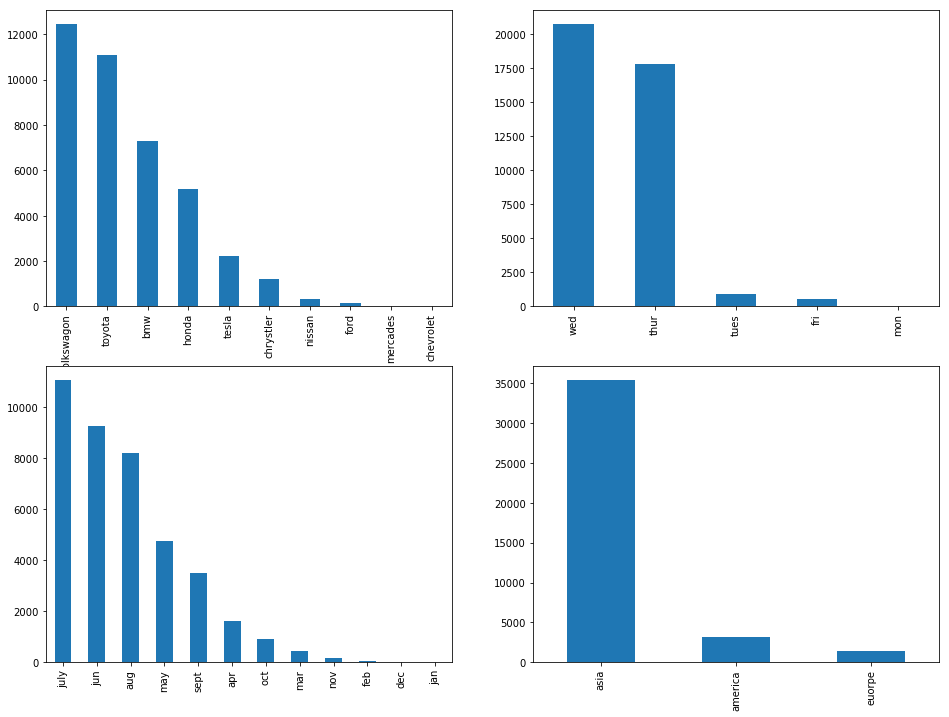

In [99]:
#DISTRIBUTION of categorical variables
plt.figure(figsize=(16,12))

plt.subplot(2,2,1)
df_train2["x34"].value_counts().plot(kind = "bar")

plt.subplot(2,2,2)
df_train2["x35"].value_counts().plot(kind = "bar")

plt.subplot(2,2,3)
df_train2["x68"].value_counts().plot(kind = "bar")

plt.subplot(2,2,4)
df_train2["x93"].value_counts().plot(kind = "bar")
plt.show()

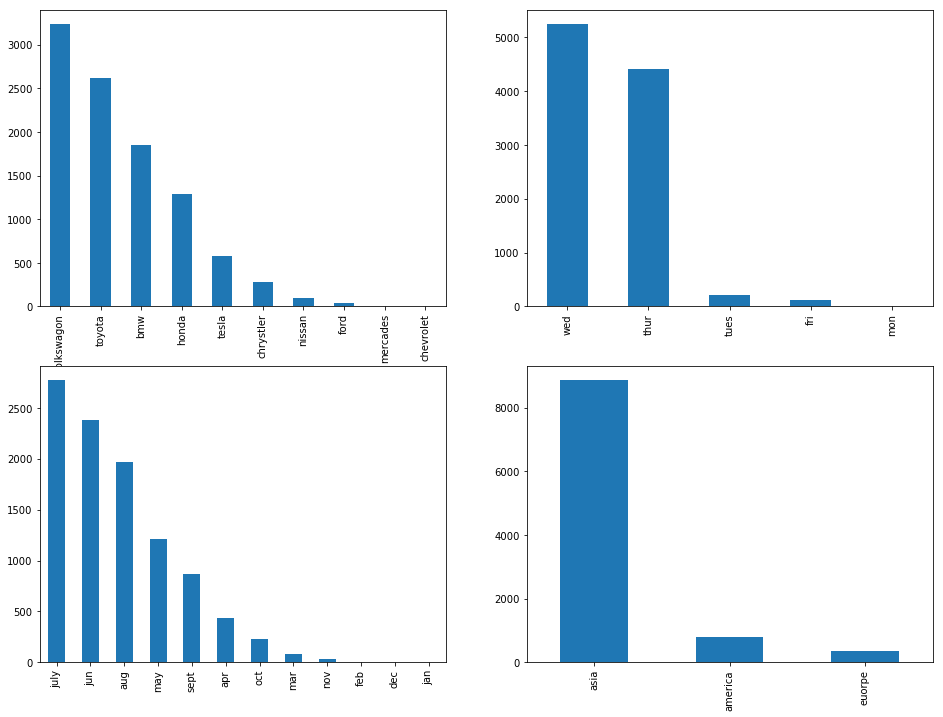

In [100]:
#DISTRIBUTION of categorical variables in the test set
plt.figure(figsize=(16,12))

plt.subplot(2,2,1)
df_test2["x34"].value_counts().plot(kind = "bar")

plt.subplot(2,2,2)
df_test2["x35"].value_counts().plot(kind = "bar")

plt.subplot(2,2,3)
df_test2["x68"].value_counts().plot(kind = "bar")

plt.subplot(2,2,4)
df_test2["x93"].value_counts().plot(kind = "bar")
plt.show()

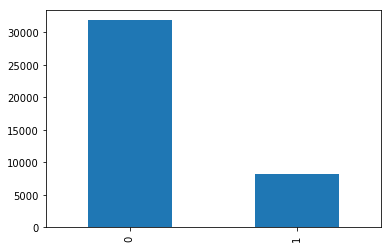

In [112]:
# Class-disribution
df_train2.y.value_counts().plot(kind='bar')

## Missing values in the categorical variables

In [240]:
df_train2_cat.x34.value_counts(dropna=False)

volkswagon    12455
toyota        11079
bmw            7282
honda          5179
tesla          2248
chrystler      1219
nissan          334
ford            159
mercades         27
chevrolet        11
NaN               7
Name: x34, dtype: int64

In [241]:
df_train2_cat.x35.value_counts(dropna=False)

wed     20713
thur    17758
tues      894
fri       561
mon        61
NaN        13
Name: x35, dtype: int64

In [242]:
df_train2_cat.x68.value_counts(dropna=False)

july    11080
jun      9261
aug      8211
may      4769
sept     3485
apr      1614
oct       904
mar       431
nov       151
feb        56
dec        20
jan        10
NaN         8
Name: x68, dtype: int64

In [243]:
df_train2_cat.x93.value_counts(dropna=False)

asia       35416
america     3131
euorpe      1446
NaN            7
Name: x93, dtype: int64

## Missing entries in categorical variables
<hr>
<ul>
<li>There are 44 rows in the categorical variables that have missing entries.</li>
<li>There are 818 rows (around 0.5%) in total that have missing entries.</li>
</ul>

In [102]:
df_train2_cat[df_train2_cat.isnull().any(axis=1)].shape

(44, 6)

In [103]:
# Rows with one or more NaN: There 818 rows, around 0.5% that has null values
df_train2[df_train2.isnull().any(axis=1)].shape 

(818, 101)

In [104]:
# COPY df_train2, df_test2 for safekeep again
df_train3 = df_train2.copy()
df_test3 = df_test2.copy()

In [248]:
# SAVING the progress so far
#df_train2.to_csv("./data/df_train2_120517.csv")
#df_test2.to_csv("./data/df_test2_120517.csv")

In [105]:
# REMOVE THE '$' SIGN
new_x41_train = df_train2['x41'].str.replace( '$','').astype(float)
#new_x41_train = new_x41_train

new_x41_test = df_test2['x41'].str.replace( '$','').astype(float)
#new_x41_test = new_x41_test.df_test2['x41'].astype(float)

In [106]:
df_train2["x41"] = new_x41_train
df_test2["x41"] = new_x41_test

In [107]:
#REMOVE THE '%' SIGN
new_x45_train = df_train2_cat['x45'].str.replace('%','').astype(float)
new_x45_test = df_test2_cat['x45'].str.replace('%','').astype(float)

In [108]:
df_train2["x45"] = new_x45_train
df_test2["x45"] = new_x45_test

In [109]:
# Rows with one or more NaN: There 818 rows, around 0.5% that has null values
df_train2[df_train2.isnull().any(axis=1)].shape 

(818, 101)

In [129]:
# COPY df_train2, df_test2: Only issue left is missing numerical data
df_train4 = df_train2.copy()
df_test4 = df_test2.copy()

In [252]:
# SAVING THE PROGRESS
#df_train2.to_csv("./data/df_train3_120517.csv")
#df_test2.to_csv("./data/df_test3_120517.csv")

In [47]:
df_train2.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 101 columns):
x0     float64
x1     float64
x2     float64
x3     float64
x4     float64
x5     float64
x6     float64
x7     float64
x8     float64
x9     float64
x10    float64
x11    float64
x12    float64
x13    float64
x14    float64
x15    float64
x16    float64
x17    float64
x18    float64
x19    float64
x20    float64
x21    float64
x22    float64
x23    float64
x24    float64
x25    float64
x26    float64
x27    float64
x28    float64
x29    float64
x30    float64
x31    float64
x32    float64
x33    float64
x34    object
x35    object
x36    float64
x37    float64
x38    float64
x39    float64
x40    float64
x41    float64
x42    float64
x43    float64
x44    float64
x45    float64
x46    float64
x47    float64
x48    float64
x49    float64
x50    float64
x51    float64
x52    float64
x53    float64
x54    float64
x55    float64
x56    float64
x57    float64
x58    float64
x59    

In [111]:
#check
df_train2.loc[:,df_train2.dtypes==object].head()

,x34,x35,x68,x93
0,toyota,wed,jun,asia
1,honda,wed,sept,asia
2,bmw,wed,oct,america
3,volkswagon,wed,jun,asia
4,volkswagon,thur,july,asia


### Handling Outliers: 
***
** A univariate approach**
- We will cap and fold values in every numerical column that fall outside 2 IQR on both sides.

NOTE: There could still be possibility of outliers. We shoudl aim to have models robust to outliers

In [130]:
#zscore = lambda x: (x - df_raw['x0'].mean())/df_raw['x0'].std()
#x0 = df_raw['x0'].map(zscore)
def fix_outliers(df, col, how='cap_fold',N=1.5, inplace=False ):
    '''
    Function to manage outliers in a dataframe.
    ---------
    Parameters
    ---------
        df: the dataframe
        col: name of the column
        how: the method by which outliers should be handled. Default is 'cap and fold'. 
            'cap_fold', 'mean', 'median', 'mode' are other possibilities.
        N:  number of inter quartile range that should be kept in the fence
        inplace: True makes the changes in the given dataframe itself. False by default
    ---------
    Returns
    ---------
    a dataframe where outliers have been dealt with
    '''
    if df[col].dtype==object:
        if inplace:
            return 
        else:
            return df[col]

    
    df_col = df[col].copy()
    if how=='drop':
        pass
    else:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1     # Interquartile range
        low_fence = q1 - 1.5*iqr
        upper_fence = q3 + 1.5*iqr
        
        ## Change the element if does not fall inside the fences
        df_col = df[col].where(df[col] > low_fence, low_fence)
        df_col = df_col.where(df_col < upper_fence, upper_fence)
        
    if inplace:
        df[col]=df_col
        return
    else:
        return df_col

In [134]:
# Just a check
cols = list(df_train2.columns)

for col in cols:
    if not(col=='y'):
        fix_outliers(df_train2, col, inplace=True)

In [135]:
sum(df_train2.y)

8144

### Handling missing entries
***
As only 0.5% of the data is missing, we will choose to delete them

In [136]:
df_train2.dropna(inplace=True)

In [137]:
# Missing data check
df_train2[df_train2.isnull().any(axis=1)].shape 

(0, 101)

## One hot encoding of categorical variable
<hr>


In [138]:
# One Hot encoding for categorical variables
df_train2_OH = pd.get_dummies(df_train2, columns=["x34", "x35", "x68", "x93"], 
                              prefix=["brand", "day", "month", "country"], )
df_test2_OH = pd.get_dummies(df_test2, columns=["x34", "x35", "x68", "x93"], 
                              prefix=["brand", "day", "month", "country"])

In [139]:
#Check
print df_train2_OH.columns[100:127]

Index([u'brand_ford', u'brand_honda', u'brand_mercades', u'brand_nissan',
       u'brand_tesla', u'brand_toyota', u'brand_volkswagon', u'day_fri',
       u'day_mon', u'day_thur', u'day_tues', u'day_wed', u'month_apr',
       u'month_aug', u'month_dec', u'month_feb', u'month_jan', u'month_july',
       u'month_jun', u'month_mar', u'month_may', u'month_nov', u'month_oct',
       u'month_sept', u'country_america', u'country_asia', u'country_euorpe'],
      dtype='object')


In [140]:
print df_test2_OH.columns[100:127]

Index([u'brand_honda', u'brand_mercades', u'brand_nissan', u'brand_tesla',
       u'brand_toyota', u'brand_volkswagon', u'day_fri', u'day_mon',
       u'day_thur', u'day_tues', u'day_wed', u'month_apr', u'month_aug',
       u'month_dec', u'month_feb', u'month_jan', u'month_july', u'month_jun',
       u'month_mar', u'month_may', u'month_nov', u'month_oct', u'month_sept',
       u'country_america', u'country_asia', u'country_euorpe'],
      dtype='object')


#### NOTE: Faulty approach as the column names in test and train could differ in order
<hr>
There could be different ways of solving this.
- Combine the train and test data and apply one hot encoding simultaniously.
- Use Scikit-learn's OneHotEncoding Feature instead that could be setup to return the same order.

In [141]:
# Rows with one or more NaN: There 818 rows, around 0.5% that has null values
df_train2[df_train2.isnull().any(axis=1)].shape 

(0, 101)

In [142]:
# Note that there is no y column in test data
df_train_test2 = pd.concat([df_train2.iloc[:, 0:100], df_test2])

In [143]:
df_train_test2.shape

(49965, 100)

In [144]:
df_train_test2_OH = pd.get_dummies(df_train_test2, columns=["x34", "x35", "x68", "x93"], 
                              prefix=["brand", "day", "month", "country"])

In [145]:
df_train_test2_OH.shape

(49965, 126)

In [146]:
#Separate the train and test data.
df_train2_OH = df_train_test2_OH.iloc[0:df_train2.shape[0], :].copy()
df_test2_OH = df_train_test2_OH.iloc[df_train2.shape[0]:df_train_test2_OH.shape[0], :].copy()

In [147]:
df_train2_OH[df_train2_OH.isnull().any(axis=1)].shape 

(0, 126)

In [148]:
df_train2_OH.loc[:,'y'] = df_train2.loc[:,'y']

In [149]:
df_train2_OH.shape

(39965, 127)

In [150]:
sum(df_train2.loc[:,'y'])

8139

In [151]:
#Sanity check
assert any(df_train2_OH.loc[0:df_train2.shape[0],'y']==df_train2.loc[0:df_train2.shape[0],'y'])

In [152]:
# SAVE DF after ONE HOT ENCODING
df_train2_OH.to_csv("./datasets/train2.csv",index=False)
df_test2_OH.to_csv("./datasets/test2.csv", index=False)

### A predictive model for claim approval in part 2.